In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png','pdf')

In [5]:
from sklearn.datasets import load_boston

boston = load_boston()
x_org, yt=boston.data, boston.target
feature_names=boston.feature_names
print('원본 데이터', x_org.shape, yt.shape)
print('항목 이름: ',feature_names)

x_data=x_org[:,feature_names =='RM']
print('RM 데이터',x_data.shape)

x=np.insert(x_data,0, 1.0,axis=1)
print('더미 변수 추가 후의 RM 데이터',x.shape)

원본 데이터 (506, 13) (506,)
항목 이름:  ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
RM 데이터 (506, 1)
더미 변수 추가 후의 RM 데이터 (506, 2)


In [6]:
print(x.shape)
print(x[:5,:])

(506, 2)
[[1.    6.575]
 [1.    6.421]
 [1.    7.185]
 [1.    6.998]
 [1.    7.147]]


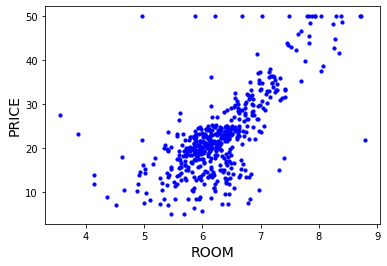

In [9]:
plt.scatter(x[:,1],yt,s=10,c='b')
plt.xlabel('ROOM',fontsize=14)
plt.ylabel('PRICE',fontsize=14)
plt.show()

In [10]:
def pred(x,w):
    return(x @w)

In [11]:
M=x.shape[0]
D=x.shape[1]
iters=50000
alpha=0.01
w=np.ones(D)
history=np.zeros((0,2))

In [13]:
for k in range(iters):
    yp=pred(x,w)
    yd=yp-yt
    w=w-alpha*(x.T@yd)/M
    
    if(k%100==0):
        loss=np.mean(yd**2)/2
        history=np.vstack((history,np.array([k,loss])))
        print("iter=%d loss=%f"%(k,loss))

iter=0 loss=154.224934
iter=100 loss=29.617518
iter=200 loss=29.431766
iter=300 loss=29.250428
iter=400 loss=29.073399
iter=500 loss=28.900577
iter=600 loss=28.731861
iter=700 loss=28.567154
iter=800 loss=28.406360
iter=900 loss=28.249388
iter=1000 loss=28.096145
iter=1100 loss=27.946544
iter=1200 loss=27.800498
iter=1300 loss=27.657922
iter=1400 loss=27.518733
iter=1500 loss=27.382852
iter=1600 loss=27.250200
iter=1700 loss=27.120700
iter=1800 loss=26.994277
iter=1900 loss=26.870858
iter=2000 loss=26.750372
iter=2100 loss=26.632749
iter=2200 loss=26.517921
iter=2300 loss=26.405821
iter=2400 loss=26.296385
iter=2500 loss=26.189549
iter=2600 loss=26.085252
iter=2700 loss=25.983433
iter=2800 loss=25.884034
iter=2900 loss=25.786997
iter=3000 loss=25.692265
iter=3100 loss=25.599784
iter=3200 loss=25.509501
iter=3300 loss=25.421363
iter=3400 loss=25.335320
iter=3500 loss=25.251320
iter=3600 loss=25.169317
iter=3700 loss=25.089263
iter=3800 loss=25.011111
iter=3900 loss=24.934815
iter=4000 l

iter=34700 loss=21.802179
iter=34800 loss=21.802133
iter=34900 loss=21.802089
iter=35000 loss=21.802046
iter=35100 loss=21.802004
iter=35200 loss=21.801963
iter=35300 loss=21.801923
iter=35400 loss=21.801884
iter=35500 loss=21.801846
iter=35600 loss=21.801808
iter=35700 loss=21.801772
iter=35800 loss=21.801736
iter=35900 loss=21.801702
iter=36000 loss=21.801668
iter=36100 loss=21.801635
iter=36200 loss=21.801602
iter=36300 loss=21.801571
iter=36400 loss=21.801540
iter=36500 loss=21.801510
iter=36600 loss=21.801481
iter=36700 loss=21.801452
iter=36800 loss=21.801424
iter=36900 loss=21.801397
iter=37000 loss=21.801370
iter=37100 loss=21.801344
iter=37200 loss=21.801319
iter=37300 loss=21.801294
iter=37400 loss=21.801270
iter=37500 loss=21.801246
iter=37600 loss=21.801223
iter=37700 loss=21.801201
iter=37800 loss=21.801179
iter=37900 loss=21.801157
iter=38000 loss=21.801136
iter=38100 loss=21.801116
iter=38200 loss=21.801096
iter=38300 loss=21.801076
iter=38400 loss=21.801057
iter=38500 l

In [14]:
print('손실함수 초깃값: %f'%history[0,1])
print('손실함수 최종값: %f'%history[-1,1])

손실함수 초깃값: 154.224934
손실함수 최종값: 21.800325


In [15]:
xall=x[:,1].ravel()
xl=np.array([[1,xall.min()],[1,xall.max()]])
yl=pred(xl,w)

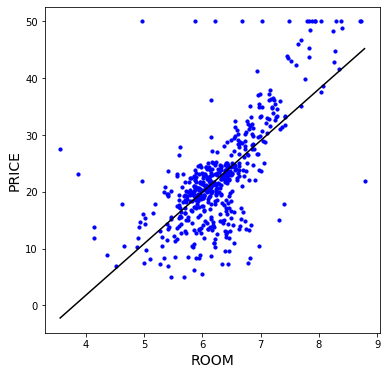

In [16]:
plt.figure(figsize=(6,6))
plt.scatter(x[:,1],yt,s=10,c='b')
plt.xlabel('ROOM',fontsize=14)
plt.ylabel('PRICE',fontsize=14)
plt.plot(xl[:,1],yl,c='k')
plt.show()

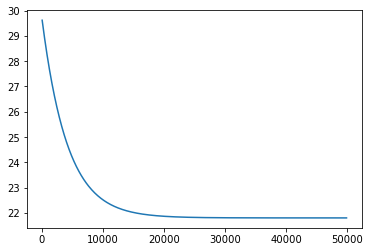

In [17]:
plt.plot(history[1:,0],history[1:,1])
plt.show()

In [19]:
x_add=x_org[:,feature_names=='LSTAT']
x2=np.hstack((x,x_add))
print(x2.shape)

(506, 3)


In [20]:
print(x2[:5,:])

[[1.    6.575 4.98 ]
 [1.    6.421 9.14 ]
 [1.    7.185 4.03 ]
 [1.    6.998 2.94 ]
 [1.    7.147 5.33 ]]


In [22]:
M=x2.shape[0]
D=x2.shape[1]
iters=50000
alpha=0.01
w=np.ones(D)
history=np.zeros((0,2))

In [24]:
for k in range(iters):
    yp=pred(x2,w)
    yd=yp-yt
    w=w-alpha*(x2.T@yd)/M
    
    if(k%100==0):
        loss=np.mean(yd**2)/2
        history=np.vstack((history,np.array([k,loss])))
        print("iter=%d loss=%f"%(k,loss))

iter=0 loss=112.063982
iter=100 loss=3753823486849610628864172621824.000000
iter=200 loss=2655334090092026361153837184589272951329622652146491383087104.000000
iter=300 loss=1878297995285430553928243913715267047705770363645132117690264635882454363521086849934163968.000000
iter=400 loss=1328647635059358330613969788887884200681749801864725170527041101223602339574519030528101713229238117999330633839122841600.000000
iter=500 loss=939842635502874217447721177422780482192017393653628544426431942322285139521264510306929205153481377275006459703879895895307975579408009352139046387712.000000
iter=600 loss=664814474659062838166829876412465024400481392182920213194275122737070178069715197185351109716128902565652085010572959019229198835332310161243608042591804538686943536694050009645056.000000
iter=700 loss=47026839283547492341705875525098401929029596951431251224344268342162115794842863951187392539671111846559760623971931931506453208315108642604300773083994071194156907880691486456639818690776156741155

<ipython-input-24-c0200cc9f6ef>:7: RuntimeWarning: overflow encountered in square
  loss=np.mean(yd**2)/2
<ipython-input-24-c0200cc9f6ef>:4: RuntimeWarning: invalid value encountered in matmul
  w=w-alpha*(x2.T@yd)/M
<ipython-input-24-c0200cc9f6ef>:4: RuntimeWarning: invalid value encountered in subtract
  w=w-alpha*(x2.T@yd)/M


iter=5800 loss=nan
iter=5900 loss=nan
iter=6000 loss=nan
iter=6100 loss=nan
iter=6200 loss=nan
iter=6300 loss=nan
iter=6400 loss=nan
iter=6500 loss=nan
iter=6600 loss=nan
iter=6700 loss=nan
iter=6800 loss=nan
iter=6900 loss=nan
iter=7000 loss=nan
iter=7100 loss=nan
iter=7200 loss=nan
iter=7300 loss=nan
iter=7400 loss=nan
iter=7500 loss=nan
iter=7600 loss=nan
iter=7700 loss=nan
iter=7800 loss=nan
iter=7900 loss=nan
iter=8000 loss=nan
iter=8100 loss=nan
iter=8200 loss=nan
iter=8300 loss=nan
iter=8400 loss=nan
iter=8500 loss=nan
iter=8600 loss=nan
iter=8700 loss=nan
iter=8800 loss=nan
iter=8900 loss=nan
iter=9000 loss=nan
iter=9100 loss=nan
iter=9200 loss=nan
iter=9300 loss=nan
iter=9400 loss=nan
iter=9500 loss=nan
iter=9600 loss=nan
iter=9700 loss=nan
iter=9800 loss=nan
iter=9900 loss=nan
iter=10000 loss=nan
iter=10100 loss=nan
iter=10200 loss=nan
iter=10300 loss=nan
iter=10400 loss=nan
iter=10500 loss=nan
iter=10600 loss=nan
iter=10700 loss=nan
iter=10800 loss=nan
iter=10900 loss=nan
it

iter=47100 loss=nan
iter=47200 loss=nan
iter=47300 loss=nan
iter=47400 loss=nan
iter=47500 loss=nan
iter=47600 loss=nan
iter=47700 loss=nan
iter=47800 loss=nan
iter=47900 loss=nan
iter=48000 loss=nan
iter=48100 loss=nan
iter=48200 loss=nan
iter=48300 loss=nan
iter=48400 loss=nan
iter=48500 loss=nan
iter=48600 loss=nan
iter=48700 loss=nan
iter=48800 loss=nan
iter=48900 loss=nan
iter=49000 loss=nan
iter=49100 loss=nan
iter=49200 loss=nan
iter=49300 loss=nan
iter=49400 loss=nan
iter=49500 loss=nan
iter=49600 loss=nan
iter=49700 loss=nan
iter=49800 loss=nan
iter=49900 loss=nan


In [26]:
M=x2.shape[0]
D=x2.shape[1]
iters=2000
alpha=0.001
w=np.ones(D)
history=np.zeros((0,2))

In [27]:
for k in range(iters):
    yp=pred(x2,w)
    yd=yp-yt
    w=w-alpha*(x2.T@yd)/M
    
    if(k%100==0):
        loss=np.mean(yd**2)/2
        history=np.vstack((history,np.array([k,loss])))
        print("iter=%d loss=%f"%(k,loss))

iter=0 loss=112.063982
iter=100 loss=25.358934
iter=200 loss=16.391055
iter=300 loss=15.403015
iter=400 loss=15.294135
iter=500 loss=15.282114
iter=600 loss=15.280764
iter=700 loss=15.280589
iter=800 loss=15.280544
iter=900 loss=15.280514
iter=1000 loss=15.280485
iter=1100 loss=15.280456
iter=1200 loss=15.280428
iter=1300 loss=15.280399
iter=1400 loss=15.280371
iter=1500 loss=15.280342
iter=1600 loss=15.280314
iter=1700 loss=15.280285
iter=1800 loss=15.280257
iter=1900 loss=15.280228


In [28]:
print('손실함수 초깃값: %f'%history[0,1])
print('손실함수 최종값: %f'%history[-1,1])

손실함수 초깃값: 112.063982
손실함수 최종값: 15.280228


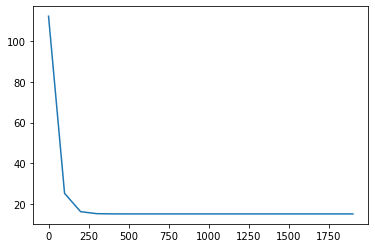

In [29]:
plt.plot(history[:,0],history[:,1])
plt.show()